# Analyzing TCR data

In [1]:
# new function to setup tutorial data
from dandelion.tutorial import setup_dandelion_tutorial_tcr

setup_dandelion_tutorial_tcr()

# change to the tutorial data directory
import os

os.chdir("dandelion_tutorial")

I'm showing two examples for reading in the data: with or without reannotation.

<b>Read in AIRR format</b>

In [2]:
import dandelion as ddl

# read in the airr_rearrangement.tsv file
file1 = "sc5p_v2_hs_PBMC_10k_t/airr_rearrangement.tsv"
file2 = "sc5p_v1p1_hs_melanoma_10k_t/airr_rearrangement.tsv"

In [3]:
vdj1 = ddl.read_10x_airr(file1)
vdj1

Dandelion class object with n_obs = 5351 and n_contigs = 10860
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'umi_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', '

In [4]:
vdj2 = ddl.read_10x_airr(file2)
vdj2

Dandelion class object with n_obs = 1560 and n_contigs = 2755
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'umi_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', 'u

In [5]:
# combine into a singular object
# let's add the sample_id to each cell barcode so that we don't end up overlapping later on
vdj1.add_cell_prefix("sc5p_v2_hs_PBMC_10k_t_")
vdj2.add_cell_prefix("sc5p_v1p1_hs_melanoma_10k_t_")

# combine into a singular object
vdj = ddl.tl.concat([vdj1, vdj2])
vdj

Dandelion class object with n_obs = 6911 and n_contigs = 13615
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'umi_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', '

<b>Read in with reannotation</b>

We specify the `filename_prefix` option because they have different prefixes that precedes `_contig.fasta` and `_contig_annotations.csv`.

In [6]:
samples = ["sc5p_v2_hs_PBMC_10k_t", "sc5p_v1p1_hs_melanoma_10k_t"]

ddl.pp.format_fastas(samples, prefix=samples, filename_prefix="filtered")

Formatting fasta(s) : 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


Make sure to toggle `loci = 'tr'` for TCR data. I'm setting `reassign_dj = True` so as to try and force a reassignment of J genes (and D genes if it can) with stricter cut offs.

In [7]:
ddl.pp.reannotate_genes(
    samples, loci="tr", reassign_dj=True, filename_prefix="filtered"
)

Assigning genes :   0%|          | 0/2 [00:00<?, ?it/s]

         START> MakeDB
       COMMAND> igblast
  ALIGNER_FILE> filtered_contig_igblast.fmt7
      SEQ_FILE> filtered_contig.fasta
       ASIS_ID> False
    ASIS_CALLS> False
      VALIDATE> strict
      EXTENDED> True
INFER_JUNCTION> False

PROGRESS> 19:13:44 |Done                | 0.0 min

PROGRESS> 19:13:48 |####################| 100% (13,630) 0.1 min

OUTPUT> filtered_contig_igblast_db-pass.tsv
  PASS> 12246
  FAIL> 1384
   END> MakeDb

         START> MakeDB
       COMMAND> igblast
  ALIGNER_FILE> filtered_contig_igblast.fmt7
      SEQ_FILE> filtered_contig.fasta
       ASIS_ID> False
    ASIS_CALLS> False
      VALIDATE> strict
      EXTENDED> True
INFER_JUNCTION> False

PROGRESS> 19:13:49 |Done                | 0.0 min

PROGRESS> 19:13:53 |####################| 100% (13,630) 0.1 min

OUTPUT> filtered_contig_igblast_db-pass.tsv
  PASS> 12246
  FAIL> 1384
   END> MakeDb



Assigning genes :  50%|█████     | 1/2 [02:28<02:28, 148.52s/it]

         START> MakeDB
       COMMAND> igblast
  ALIGNER_FILE> filtered_contig_igblast.fmt7
      SEQ_FILE> filtered_contig.fasta
       ASIS_ID> False
    ASIS_CALLS> False
      VALIDATE> strict
      EXTENDED> True
INFER_JUNCTION> False

PROGRESS> 19:14:46 |Done                | 0.0 min

PROGRESS> 19:14:48 |####################| 100% (3,706) 0.0 min

OUTPUT> filtered_contig_igblast_db-pass.tsv
  PASS> 3217
  FAIL> 489
   END> MakeDb

         START> MakeDB
       COMMAND> igblast
  ALIGNER_FILE> filtered_contig_igblast.fmt7
      SEQ_FILE> filtered_contig.fasta
       ASIS_ID> False
    ASIS_CALLS> False
      VALIDATE> strict
      EXTENDED> True
INFER_JUNCTION> False

PROGRESS> 19:14:48 |Done                | 0.0 min

PROGRESS> 19:14:49 |####################| 100% (3,706) 0.0 min

OUTPUT> filtered_contig_igblast_db-pass.tsv
  PASS> 3217
  FAIL> 489
   END> MakeDb



Assigning genes : 100%|██████████| 2/2 [03:12<00:00, 96.18s/it] 


There's no need to run the the rest of the preprocessing steps.

We'll read in the reannotated files like as follow:

In [8]:
import pandas as pd

tcr_files = []
for sample in samples:
    file_location = sample + "/dandelion/filtered_contig_dandelion.tsv"
    tcr_files.append(pd.read_csv(file_location, sep="\t"))
tcr = pd.concat(tcr_files, ignore_index=True)
tcr.reset_index(inplace=True, drop=True)
tcr

sequence_id  \
0        sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC_contig_1   
1        sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC_contig_2   
2        sc5p_v2_hs_PBMC_10k_t_AAACCTGAGTCACGCC_contig_2   
3        sc5p_v2_hs_PBMC_10k_t_AAACCTGAGTCACGCC_contig_1   
4        sc5p_v2_hs_PBMC_10k_t_AAACCTGCACGTCAGC_contig_1   
...                                                  ...   
15458  sc5p_v1p1_hs_melanoma_10k_t_TTTGGTTTCACAGGCC_c...   
15459  sc5p_v1p1_hs_melanoma_10k_t_TTTGGTTTCTTTACGT_c...   
15460  sc5p_v1p1_hs_melanoma_10k_t_TTTGGTTTCTTTACGT_c...   
15461  sc5p_v1p1_hs_melanoma_10k_t_TTTGTCACATTTCACT_c...   
15462  sc5p_v1p1_hs_melanoma_10k_t_TTTGTCACATTTCACT_c...   

                                                sequence rev_comp productive  \
0      CTGGAAGACCACCTGGGCTGTCATTGAGCTCTGGTGCCAGGAGGAA...        F          T   
1      GAGAGTCCTGCTCCCCTTTCATCAATGCACAGATACAGAAGACCCC...        F          T   
2      CCTTTTCACCAATGCACAGACCCAGAGGACCCCTCCATCCTGCAGT...        F          T   
3      GTAGCTCGTTGATATCTGTGTGGATAGGGAGCTGTGACGAGGGCAA...        F          T   
4      CCCACATGAAGTGTCTACCTTCTGCAGACTCCAATGGCTCAGGAAC...        F          T   
...                                                  ...      ...        ...   
15458  AATGGCTCAGGAACTGGGAATGCAGTGCCAGGCTCGTGGTATCCTG...        F          T   
15459  TTCCTCTGCTCTGGCAGCAGATCTCCCAGAGGGAGCAGCCTGACCA...        F          T   
15460  GATCTTAATTGGGAAGAACAAGGATGACATCCATTCGAGCTGTATT...        F          F   
15461  TCTGGGGATGTTCACAGAGGGCCTGGTCTGGAATATTCCACATCTG...        F          T   
15462  AGATCAGAAGAGGAGGCTTCTCACCCTGCAGCAGGGACCTGTGAGC...        F          T   

                      v_call d_call               j_call  \
0              TRAV23/DV6*02    NaN            TRAJ22*01   
1                 TRBV6-5*01    NaN           TRBJ2-3*01   
2      TRBV6-2*01,TRBV6-3*01    NaN           TRBJ2-6*01   
3                 TRAV8-6*02    NaN             TRAJ8*01   
4                 TRAV1-2*01    NaN            TRAJ33*01   
...                      ...    ...                  ...   
15458             TRAV1-2*01    NaN            TRAJ20*01   
15459              TRBV30*01    NaN           TRBJ2-5*01   
15460            TRAV13-1*02    NaN            TRAJ43*01   
15461            TRBV12-4*01    NaN           TRBJ1-1*01   
15462        TRAV38-2/DV8*01    NaN  TRAJ32*01,TRAJ32*02   

                                      sequence_alignment  \
0      CAGCAGCAGGTGAAACAAAGTCCTCAATCTTTGATAGTCCAGAAAG...   
1      AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...   
2      AATGCTGGTGTCACTCAGACCCCAAAATTCCGGGTCCTGAAGACAG...   
3      GCCCAGTCTGTGACCCAGCTTGACAGCCAAGTCCCTGTCTTTGAAG...   
4      GGACAAAACATTGACCAG...CCCACTGAGATGACAGCTACGGAAG...   
...                                                  ...   
15458  GGACAAAACATTGACCAG...CCCACTGAGATGACAGCTACGGAAG...   
15459  TCTCAGACTATTCATCAATGGCCAGCGACCCTGGTGCAGCCTGTGG...   
15460  GGAGAGAATGTGGAGCAGCATCCTTCAACCCTGAGTGTCCAGGAGG...   
15461  GATGCTGGAGTTATCCAGTCACCCCGGCACGAGGTGACAGAGATGG...   
15462  GCTCAGACAGTCACTCAGTCTCAACCAGAGATGTCTGTGCAGGAGG...   

                                      germline_alignment  \
0      CAGCAGCAGGTGAAACAAAGTCCTCAATCTTTGATAGTCCAGAAAG...   
1      AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...   
2      AATGCTGGTGTCACTCAGACCCCAAAATTCCGGGTCCTGAAGACAG...   
3      GCCCAGTCTGTGACCCAGCTTGACAGCCAAGTCCCTGTCTTTGAAG...   
4      GGACAAAACATTGACCAG...CCCACTGAGATGACAGCTACGGAAG...   
...                                                  ...   
15458  GGACAAAACATTGACCAG...CCCACTGAGATGACAGCTACGGAAG...   
15459  TCTCAGACTATTCATCAATGGCCAGCGACCCTGGTGCAGCCTGTGG...   
15460  GGAGAGAATGTGGAGCAGCATCCTTCAACCCTGAGTGTCCAGGAGG...   
15461  GATGCTGGAGTTATCCAGTCACCCCGGCACGAGGTGACAGAGATGG...   
15462  GCTCAGACAGTCACTCAGTCTCAACCAGAGATGTCTGTGCAGGAGG...   

                                                junction  ...  \
0                TGTGCAGCAAGCAAGGGTTCTGCAAGGCAACTGACCTTT  ...   
1          TGTGCCAGCAGTTACCGGGGGGGATCGGAAGATACGCAGTATTTT  ...   
2    

The reannotated file can be used with dandelion as per the BCR tutorial.

For the rest of the tutorial, I'm going to show how to proceed with 10x's AIRR format file instead as there are some minor differences.

<b>Import modules for use with scanpy</b>

In [9]:
import anndata as ad
import scanpy as sc

import warnings

warnings.filterwarnings("ignore")
sc.logging.print_header()

pandas	2.2.3
sc-dandelion	0.5.7.dev226+dirty (0.5.7.dev226)
anndata	0.12.3
scanpy	1.11.5
----	----
jaraco.collections	5.1.0
decorator	5.1.1
jedi	0.19.2
cloudpickle	3.1.1
numexpr	2.10.2
lz4	4.4.5
session-info2	0.2.3
Distance	0.1.3
zarr	3.1.3
defusedxml	0.7.1
airr	1.5.1
charset-normalizer	3.4.1
presto	0.7.2
llvmlite	0.44.0
typing_extensions	4.12.2
pyzmq	26.2.0
coverage	7.8.0
fsspec	2024.12.0
donfig	0.8.1.post1
biopython	1.85
natsort	8.4.0
executing	2.1.0
patsy	1.0.1
pure_eval	0.2.3
wcwidth	0.2.13
prompt_toolkit	3.0.48
joblib	1.4.2
scikit-learn	1.5.2
platformdirs	4.3.6
palettable	3.3.3
jaraco.text	3.12.1
mizani	0.13.1
jaraco.context	5.3.0
python-dateutil	2.9.0.post0
networkx	3.4.2
pyarrow	19.0.1
MarkupSafe	3.0.2
awkward	2.7.4
yamlordereddictloader	0.4.2
ipython	8.31.0
traitlets	5.14.3
tqdm	4.67.1
tblib	3.2.1
plotnine	0.14.5
dask	2025.11.0
leidenalg	0.10.2
ipywidgets	8.1.5
numba	0.61.0
pyparsing	3.2.3
zipp	3.21.0
awkward_cpp	44
threadpoolctl	3.5.0
statsmodels	0.14.5
xarray	2025.3.1
rich	13.9.4
numpy	2.1.3
msgpack	1.1.0
sparse	0.16.0
Cython	3.0.12
legacy-api-wrap	1.4.1
attrs	24.3.0
scipy	1.15.2
comm	0.2.2
Pygments	2.19.1
six	1.17.0
appnope	0.1.4
debugpy	1.8.11
stack_data	0.6.3
igraph	0.11.8
matplotlib	3.10.1
tornado	6.4.2
pytz	2024.2
nxviz	0.7.6
Jinja2	3.1.5
asttokens	3.0.0
jupyter_core	5.7.2
more-itertools	10.6.0
toolz	1.0.0
cycler	0.12.1
importlib_metadata	8.5.0
jupyter_client	8.6.3
changeo	1.3.0
numcodecs	0.16.3
pickleshare	0.7.5
kiwisolver	1.4.8 (1.4.7)
psutil	6.1.1
texttable	1.7.0
setuptools	75.8.0
seaborn	0.13.2
zstandard	0.23.0
ipykernel	6.29.5
jaraco.functools	4.0.1
packaging	24.2
pillow	11.1.0
crc32c	2.8
PyYAML	6.0.2
polyleven	0.8
parso	0.8.4
h5py	3.12.1
setuptools-scm	8.1.0
----	----
Python	3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:21:42) [Clang 18.1.8 ]
OS	macOS-26.2-arm64-arm-64bit
CPU	8 logical CPU cores, arm
GPU	No GPU found
Updated	2026-01-05 09:15

<b>Import the transcriptome data</b>

In [10]:
adata_list = []
for sample in samples:
    adata_tmp = sc.read_10x_h5(
        f"{sample}/filtered_feature_bc_matrix.h5", gex_only=True
    )
    adata_tmp.obs["sample_id"] = sample
    adata_tmp.obs_names = [sample + "_" + x for x in adata_tmp.obs_names]
    adata_tmp.var_names_make_unique()
    adata_list.append(adata_tmp)
adata = ad.concat(adata_list)
adata

AnnData object with n_obs × n_vars = 17275 × 36601
    obs: 'sample_id'

<b>Run QC on the transcriptome data.</b>

In [11]:
ddl.pp.recipe_scanpy_qc(adata)
adata

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 17275 × 36601
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna'

<b>Filtering TCR data.</b>

Note that I'm using the `Dandelion` object as input rather than the pandas dataframe (yes both types of input will works. In fact, a file path to the .tsv will work too).

In [12]:
adata.obs

sample_id  \
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGACAGACC-1              sc5p_v2_hs_PBMC_10k_t   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC-1              sc5p_v2_hs_PBMC_10k_t   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGGCTTC-1              sc5p_v2_hs_PBMC_10k_t   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGGATCGCA-1              sc5p_v2_hs_PBMC_10k_t   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGTCACGCC-1              sc5p_v2_hs_PBMC_10k_t   
...                                                                     ...   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCACATTTCACT-1  sc5p_v1p1_hs_melanoma_10k_t   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCAGTGGTAACG-1  sc5p_v1p1_hs_melanoma_10k_t   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCACCGTAA-1  sc5p_v1p1_hs_melanoma_10k_t   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCCCTTGTG-1  sc5p_v1p1_hs_melanoma_10k_t   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCTTGAGGT-1  sc5p_v1p1_hs_melanoma_10k_t   

                                                n_genes  n_genes_by_counts  \
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGACAGACC-1           1982               1982   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC-1           1761               1761   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGGCTTC-1           1957               1957   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGGATCGCA-1           2310               2310   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGTCACGCC-1           2315               2315   
...                                                 ...                ...   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCACATTTCACT-1     1350               1350   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCAGTGGTAACG-1     1336               1336   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCACCGTAA-1     1303               1303   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCCCTTGTG-1     1396               1396   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCTTGAGGT-1     2386               2386   

                                                total_counts  total_counts_mt  \
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGACAGACC-1              4751.0            202.0   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC-1              5767.0            111.0   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGGCTTC-1              4991.0            125.0   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGGATCGCA-1              6012.0            222.0   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGTCACGCC-1              7267.0            158.0   
...                                                      ...              ...   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCACATTTCACT-1        4110.0             27.0   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCAGTGGTAACG-1        3663.0             60.0   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCACCGTAA-1        4366.0            163.0   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCCCTTGTG-1        3590.0             64.0   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCTTGAGGT-1        7794.0             91.0   

                                                pct_counts_mt  scrublet_score  \
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGACAGACC-1             4.251737        0.047859   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC-1             1.924744        0.051643   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGGCTTC-1             2.504508        0.041825   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGGATCGCA-1             3.692615        0.068592   
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGTCACGCC-1             2.174212        0.041018   
...                                                       ...             ...   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCACATTTCACT-1       0.656934        0.117207   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCAGTGGTAACG-1       1.638002        0.020134   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCACCGTAA-1       3.733394        0.071253   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCCCTTGTG-1       1.782730        0.021148   
sc5p_v1p1_hs_melanoma_10k_t_TTTGTCATCTTGAGGT-1       1.167565        0.084746   

                                               is_doublet filter_rna  
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGACAGACC-1            False      False  
sc5p_v2_hs_PBMC_10k_t_AAACCTGAGCGATAGC-1            False      False  
sc5p_v2_hs_PBMC_10k_t

In [13]:
# The function will return both objects.
vdj, adata = ddl.pp.check_contigs(vdj, adata, library_type="tr-ab")

Preparing data: 13615it [00:00, 23525.32it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 6911/6911 [00:07<00:00, 975.66it/s] 


<b>Check the output V(D)J table</b>

In [14]:
vdj

Dandelion class object with n_obs = 6846 and n_contigs = 13331
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'umi_count', 'is_cell', 'locus', 'rearrangement_status', 'ambiguous', 'extra'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 

<b>Check the AnnData object as well</b>

In [15]:
adata

AnnData object with n_obs × n_vars = 17275 × 36601
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', 'umi_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VDJ_main', 'j_call_abT_VDJ_main', 'v_call_abT_VJ_main', 'j_call_abT_VJ_main', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ'

<b>The number of cells that actually has a matching BCR can be tabluated.</b>

In [16]:
pd.crosstab(adata.obs["has_contig"], adata.obs["chain_status"])

chain_status  Extra pair  No_contig  Orphan Extra VJ  Orphan VDJ  Orphan VJ  \
has_contig                                                                    
No_contig              0      10427                0           0          0   
True                 338          2                8         946        128   

chain_status  Single pair  
has_contig                 
No_contig               0  
True                 5426

## Now actually filter the AnnData object and run through a standard workflow starting by filtering genes and normalizing the data

Because the 'filtered' `AnnData` object was returned as a filtered but otherwise unprocessed object, we still need to normalize and run through the usual process here. The following is just a standard scanpy workflow.

In [17]:
# standard preprocessing steps
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable].copy()
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

### Visualizing the clusters and whether or not there's a corresponding V(D)J receptor

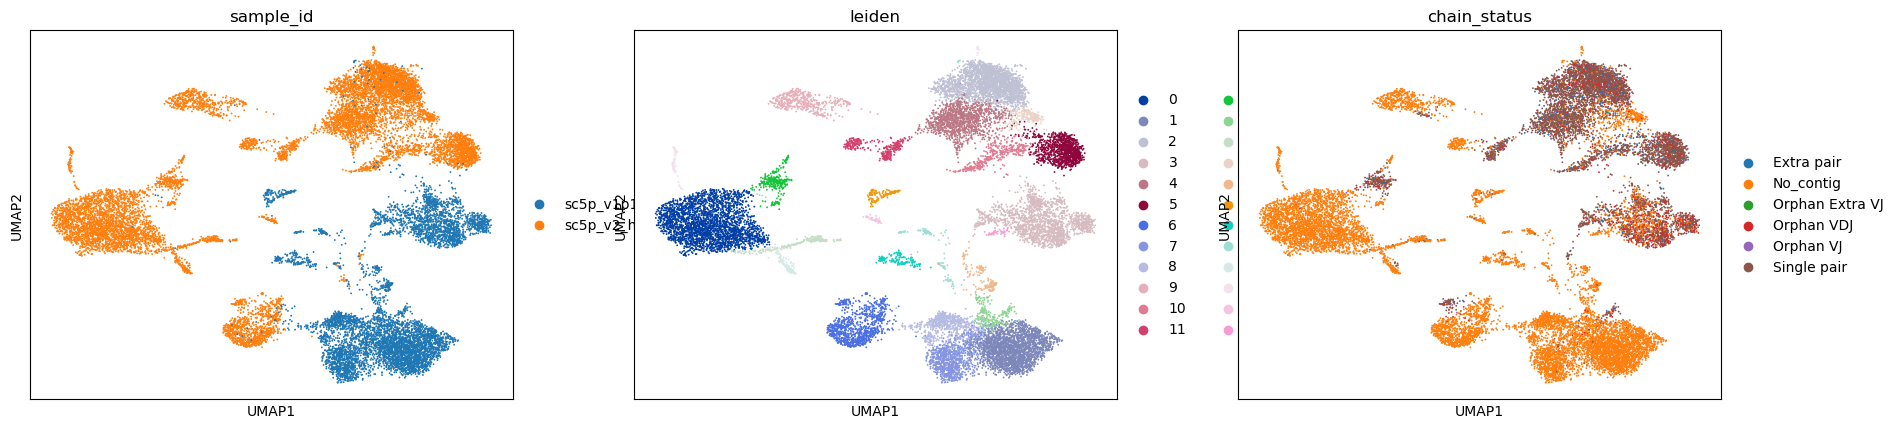

In [18]:
sc.pl.umap(adata, color=["sample_id", "leiden", "chain_status"])

### Visualizing some T cell genes

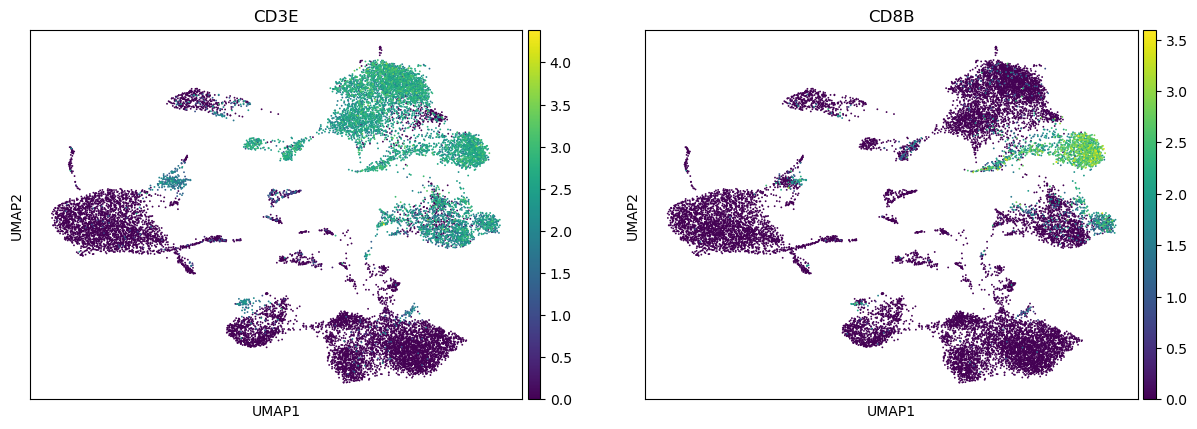

In [19]:
sc.pl.umap(adata, color=["CD3E", "CD8B"])

<b>Find clones.</b>

<div class="alert alert-info">

Note

Here we specify `identity = 1` so only cells with identical CDR3 nucleotide sequences (`key = 'junction'`) are grouped into clones/clonotypes.

</div>

In [20]:
ddl.tl.find_clones(vdj, identity=1, key="junction")
vdj

Finding clones based on abT cell VDJ chains using junction: 100%|██████████| 515/515 [00:00<00:00, 3520.02it/s]
Finding clones based on abT cell VJ chains using junction: 100%|██████████| 1634/1634 [00:00<00:00, 13778.47it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 6846/6846 [00:00<00:00, 668829.90it/s]


Dandelion class object with n_obs = 6846 and n_contigs = 13331
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'umi_count', 'is_cell', 'locus', 'rearrangement_status', 'ambiguous', 'extra', 'clone_id'
    metadata: 'clone_id', 'clone_id_rank', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'p

<b>Generate TCR network.</b>

The 10x-provided AIRR file is missing columns like `sequence_alignment` and `sequence_alignment_aa` so we will use the next best thing, which is `sequence` or `sequence_aa`. Note that these columns are not-gapped.

Specify `key = 'sequence_aa'` to toggle this behavior. Can also try `junction` or `junction_aa` if just want to visualise the CDR3 linkage.

In [21]:
# again, i'm removing the Orphan VJ cells (lacking TRB chain i.e. VDJ information).
vdj = vdj[
    vdj.metadata.chain_status.isin(
        ["Single pair", "Extra pair", "Extra pair-exception", "Orphan VDJ"]
    )
].copy()

In [22]:
ddl.tl.generate_network(vdj, key="sequence_aa")

Setting up data: 12812it [00:00, 23893.31it/s]
Linking edges : 100%|██████████| 6609/6609 [00:18<00:00, 360.22it/s] 


In [23]:
vdj

Dandelion class object with n_obs = 6710 and n_contigs = 13180
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'umi_count', 'is_cell', 'locus', 'rearrangement_status', 'ambiguous', 'extra', 'clone_id'
    metadata: 'clone_id', 'clone_id_rank', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'p

<b>Plotting in scanpy.</b>

In [24]:
ddl.tl.transfer(adata, vdj)

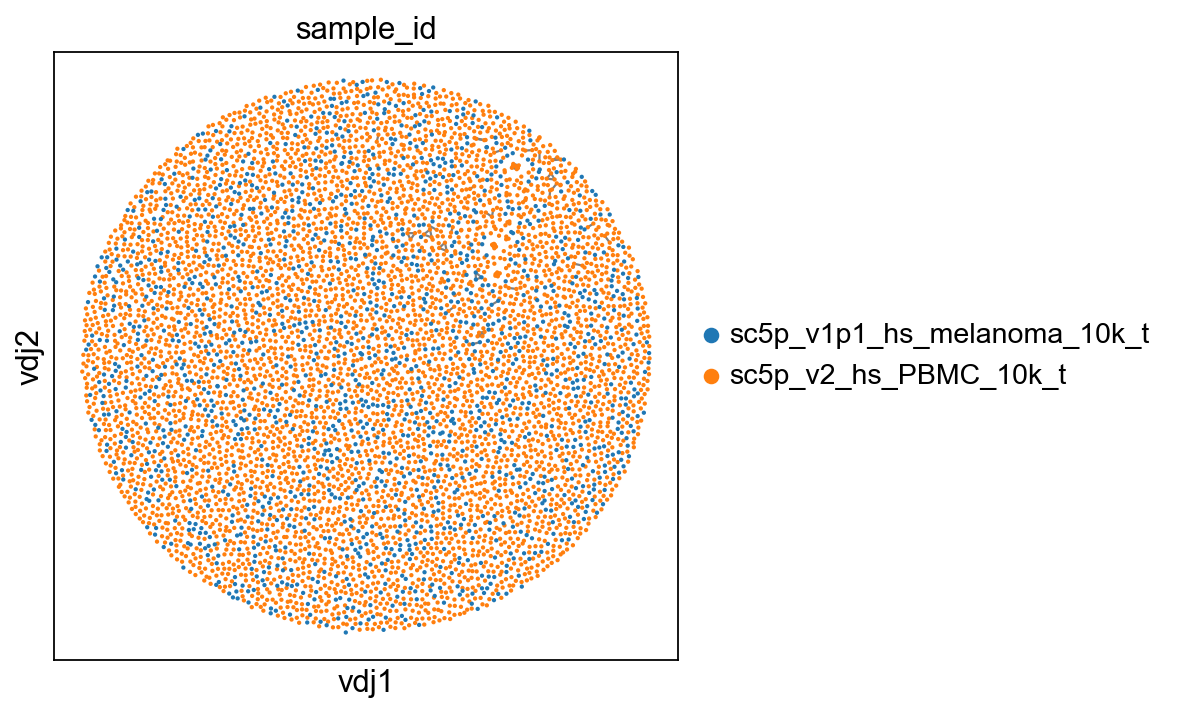

In [25]:
sc.set_figure_params(figsize=[5, 5])
ddl.pl.clone_network(adata, color=["sample_id"], edges_width=1, size=15)

In [26]:
adata

AnnData object with n_obs × n_vars = 17275 × 2305
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', 'umi_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VDJ_main', 'j_call_abT_VDJ_main', 'v_call_abT_VJ_main', 'j_call_abT_VJ_main', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ', 'leiden', 'clone_id', 'c

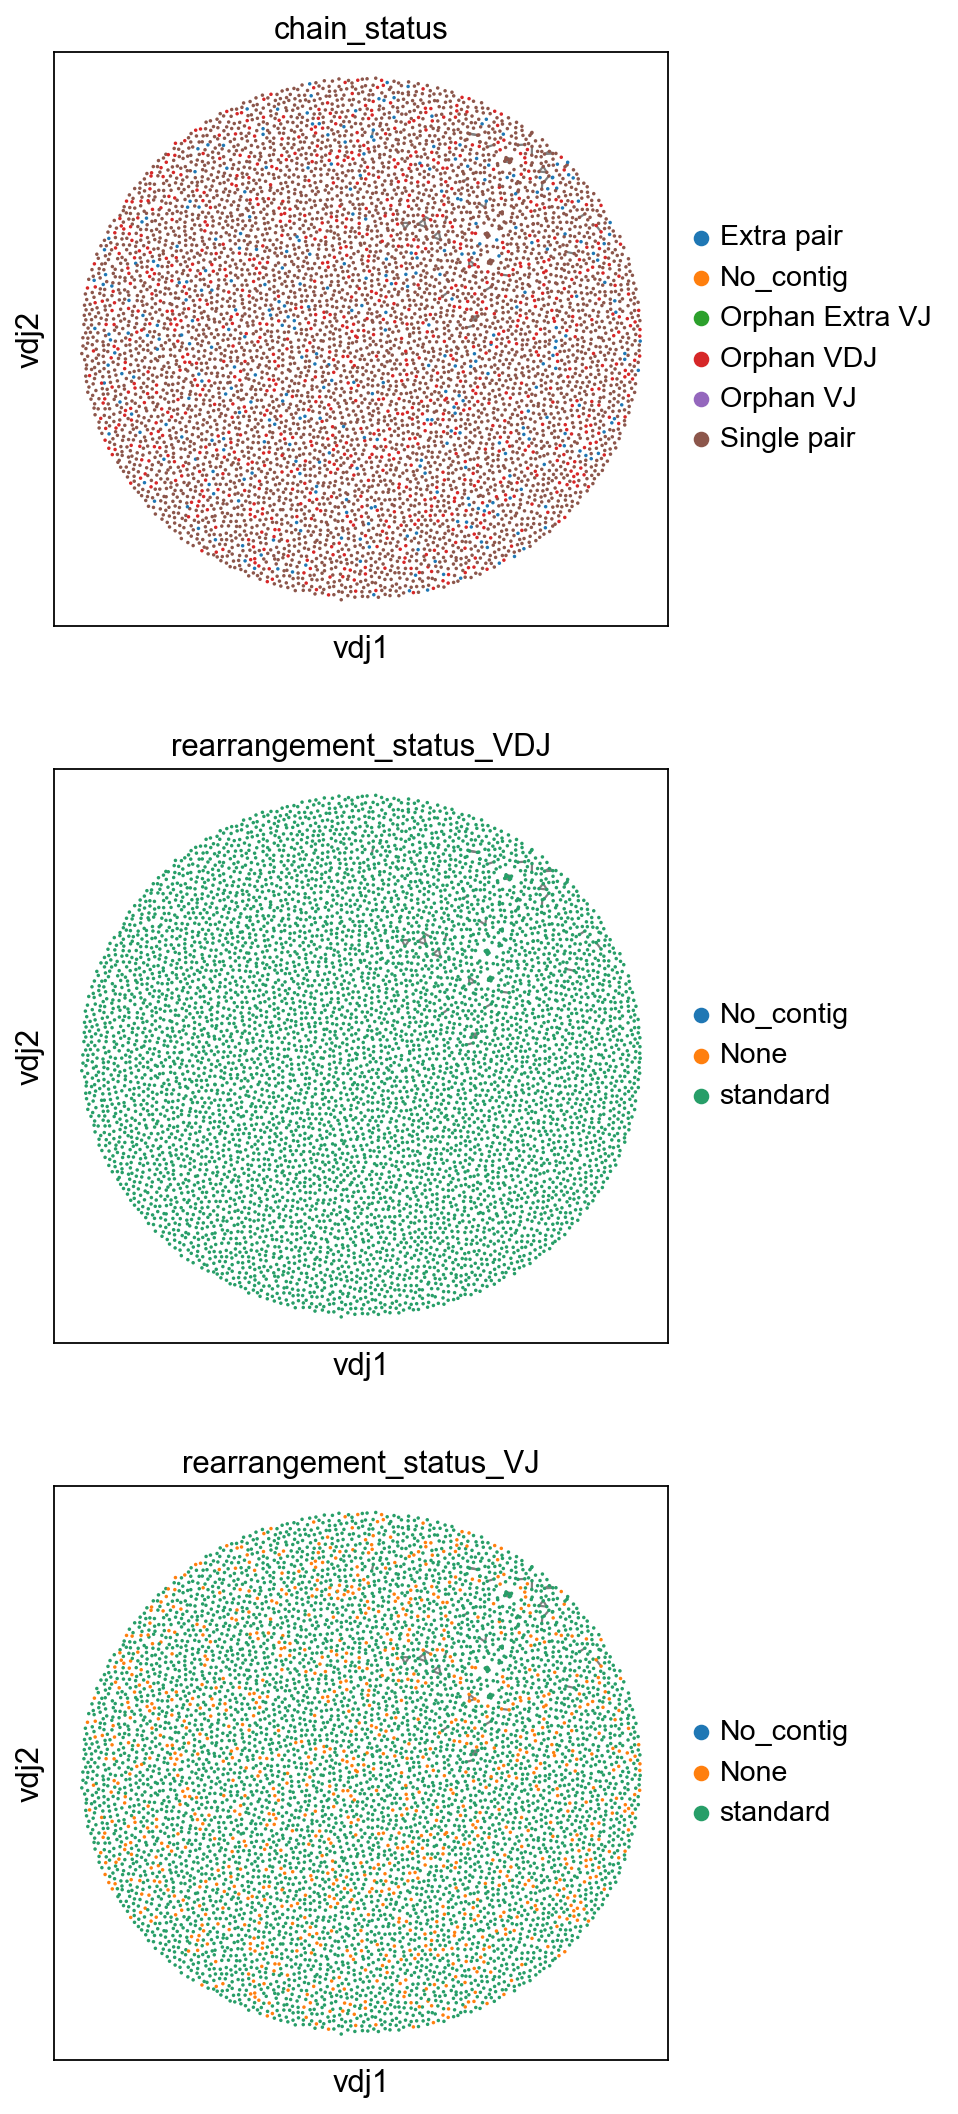

In [27]:
sc.set_figure_params(figsize=[4.5, 5])
ddl.pl.clone_network(
    adata,
    color=[
        "chain_status",
        "rearrangement_status_VDJ",
        "rearrangement_status_VJ",
    ],
    ncols=1,
    legend_fontoutline=3,
    size=10,
    edges_width=1,
)

In [28]:
ddl.tl.transfer(adata, vdj)
adata

AnnData object with n_obs × n_vars = 17275 × 2305
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', 'umi_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VDJ_main', 'j_call_abT_VDJ_main', 'v_call_abT_VJ_main', 'j_call_abT_VJ_main', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ', 'leiden', 'clone_id', 'c

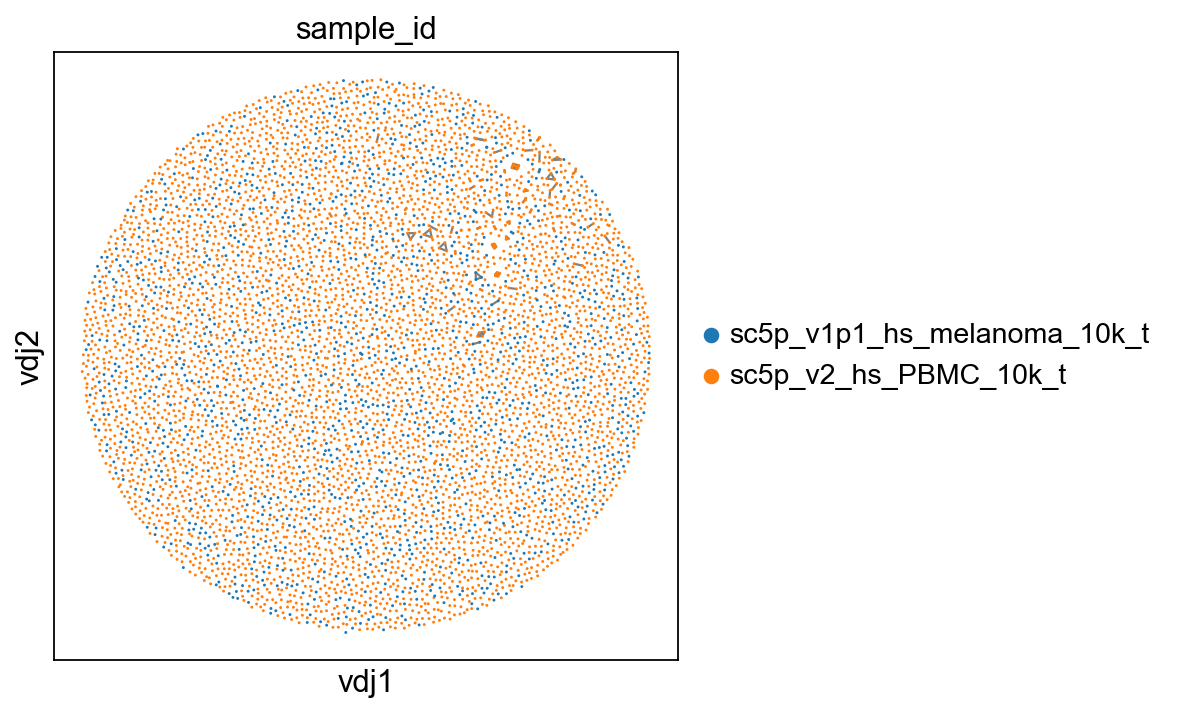

In [29]:
sc.set_figure_params(figsize=[5, 5])
ddl.pl.clone_network(adata, color=["sample_id"], edges_width=1)

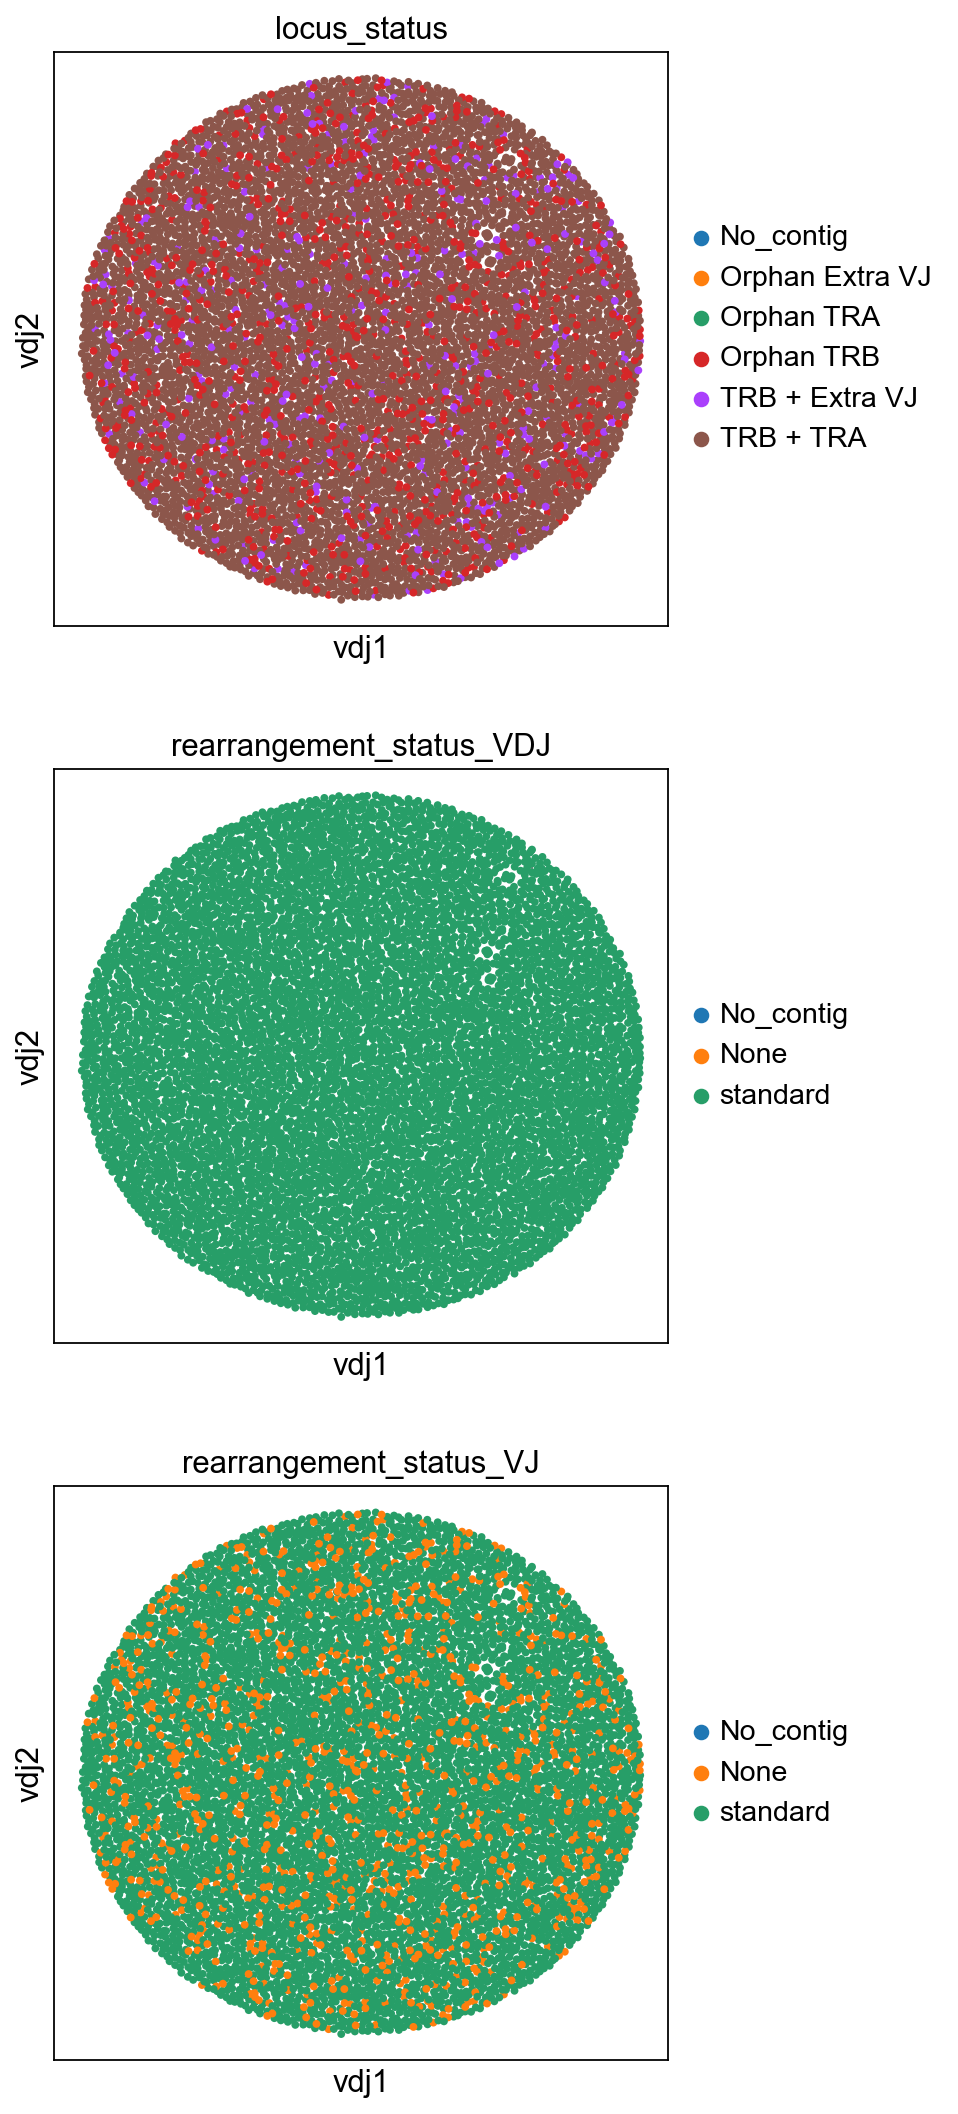

In [30]:
sc.set_figure_params(figsize=[4.5, 5])
ddl.pl.clone_network(
    adata,
    color=[
        "locus_status",
        "rearrangement_status_VDJ",
        "rearrangement_status_VJ",
    ],
    ncols=1,
    legend_fontoutline=3,
    edges_width=1,
    size=50,
)

### Using `scirpy` to plot
You can also use `scirpy`'s functions to plot the network. 

A likely use case is if you have a lot of cells and you don't want to wait for `dandelion` to generate the layout because it's taking too long. Or you simply prefer scirpy's style of plotting.

You can run `ddl.tl.generate_network(..., compute_graph = False)` and it will skip the graph construction and layout computation, and after transfer to `scirpy`, you can use its plotting functions to visualise the networks - the clone network is generated very quickly but visualising it using spring layout does take quite a while.

To access `scirpy`'s functions, you would first need to do a `Dandelion` to `scirpy` conversion first with `ddl.to_scirpy(...)`.

In [32]:
import scirpy as ir

iradata = ddl.tl.to_scirpy(vdj, gex_adata=adata, transfer=True)
iradata

MuData object with n_obs × n_vars = 17275 × 2305
  2 modalities
    gex:	17275 x 2305
      obs:	'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', 'umi_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VDJ_main', 'j_call_abT_VDJ_main', 'v_call_abT_VJ_main', 'j_call_abT_VJ_main', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ', 'leiden', 'clone_id', 'clone_id_rank'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'sample_id_colors', 'leiden_colors', 'chain_status_colors', 'gex_neighbors', 'clone_id', 'rearrangement_status_VDJ_colors', 'rearrangement_status_VJ_colors', 'locus_status_colors'
      obsm:	'X_pca', 'X_umap', 'X_vdj_all', 'X_vdj_expanded', 'X_vdj'
      varm:	'PCs'
      obsp:	'distances', 'connectivities', 'gex_connectivities', 'gex_distances', 'vdj_connectivities_all', 'vdj_distances_all', 'vdj_connectivities_expanded', 'vdj_distances_expanded', 'vdj_connectivities_full', 'vdj_distances_full'
    airr:	6710 x 0
      obs:	'clone_id', 'clone_id_rank', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'umi_count_abT_VDJ', 'umi_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VDJ_main', 'j_call_abT_VDJ_main', 'v_call_abT_VJ_main', 'j_call_abT_VJ_main', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ'
      uns:	'clone_id', 'neighbors'
      obsm:	'airr', 'X_vdj_all', 'X_vdj_expanded', 'X_vdj'
      obsp:	'connectivities', 'distances', 'vdj_connectivities_all', 'vdj_distances_all', 'vdj_connectivities_expanded', 'vdj_distances_expanded', 'vdj_connectivities_full', 'vdj_distances_full'

<Axes: >

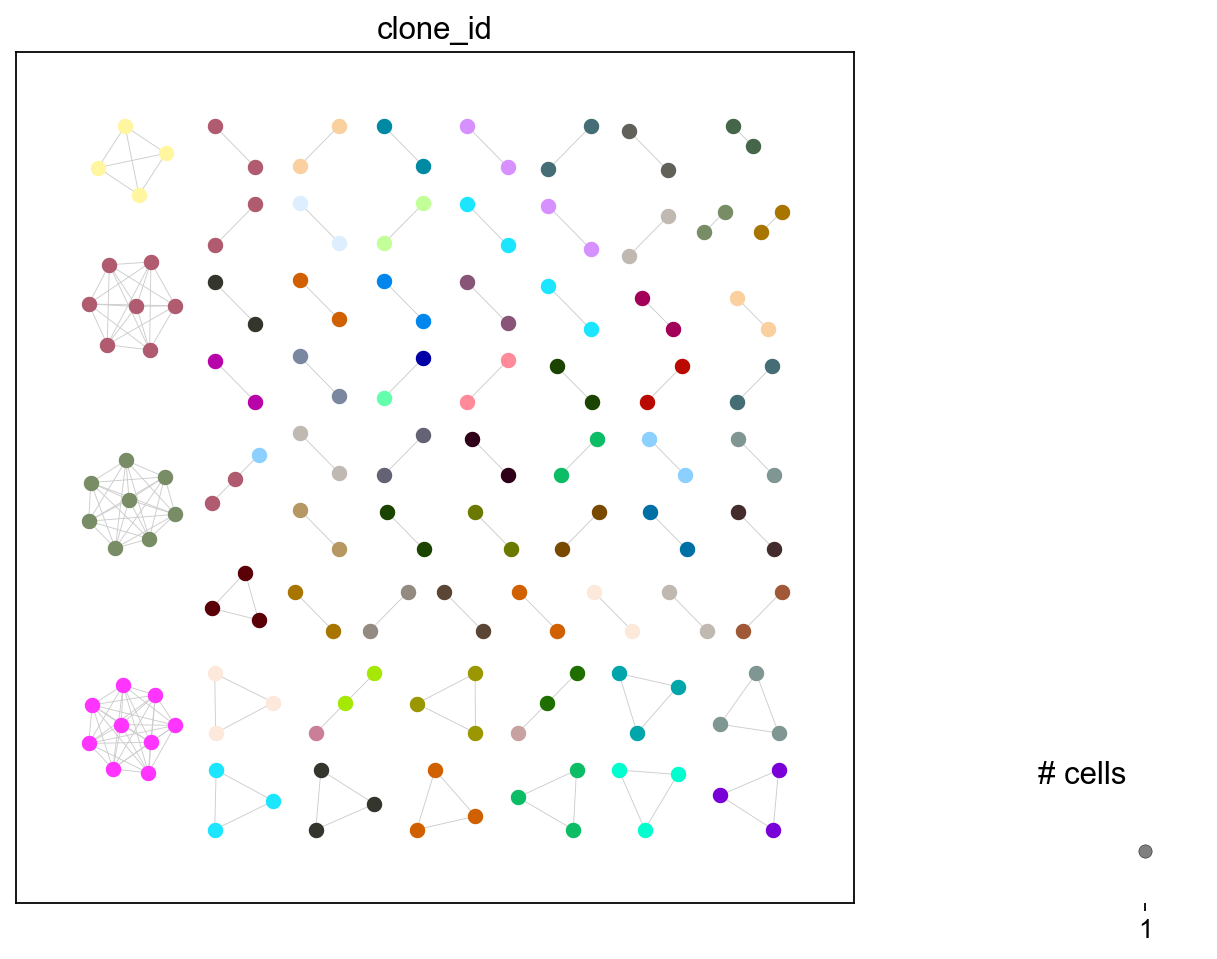

In [33]:
ir.tl.clonotype_network(iradata, min_cells=2)
ir.pl.clonotype_network(
    iradata, color="clone_id", panel_size=(7, 7), show_labels=False
)

You can change the clonotype labels by transferring with a different `clone_key`. For example, using `clone_id_rank` which is numerically ordered from largest to smallest in ascending order where 1 is the largest clone and so on.

<Axes: >

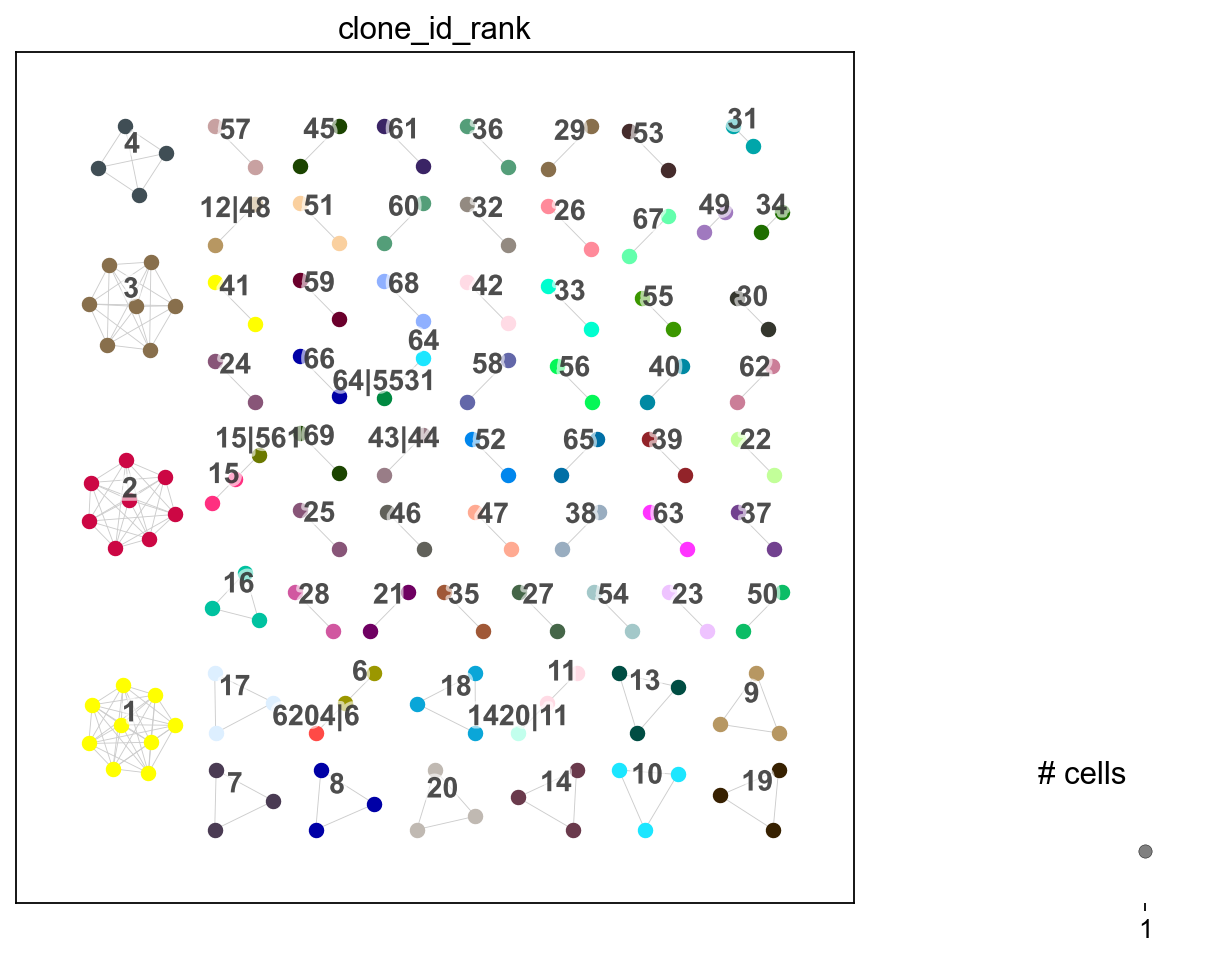

In [34]:
ddl.tl.transfer(iradata, vdj, clone_key="clone_id_rank")
ir.tl.clonotype_network(iradata, clonotype_key="clone_id_rank", min_cells=2)
ir.pl.clonotype_network(iradata, color="clone_id_rank", panel_size=(7, 7))

You can also transfer with the clones collapsed for plotting as pie-charts as per how `scirpy` does it.

<Axes: >

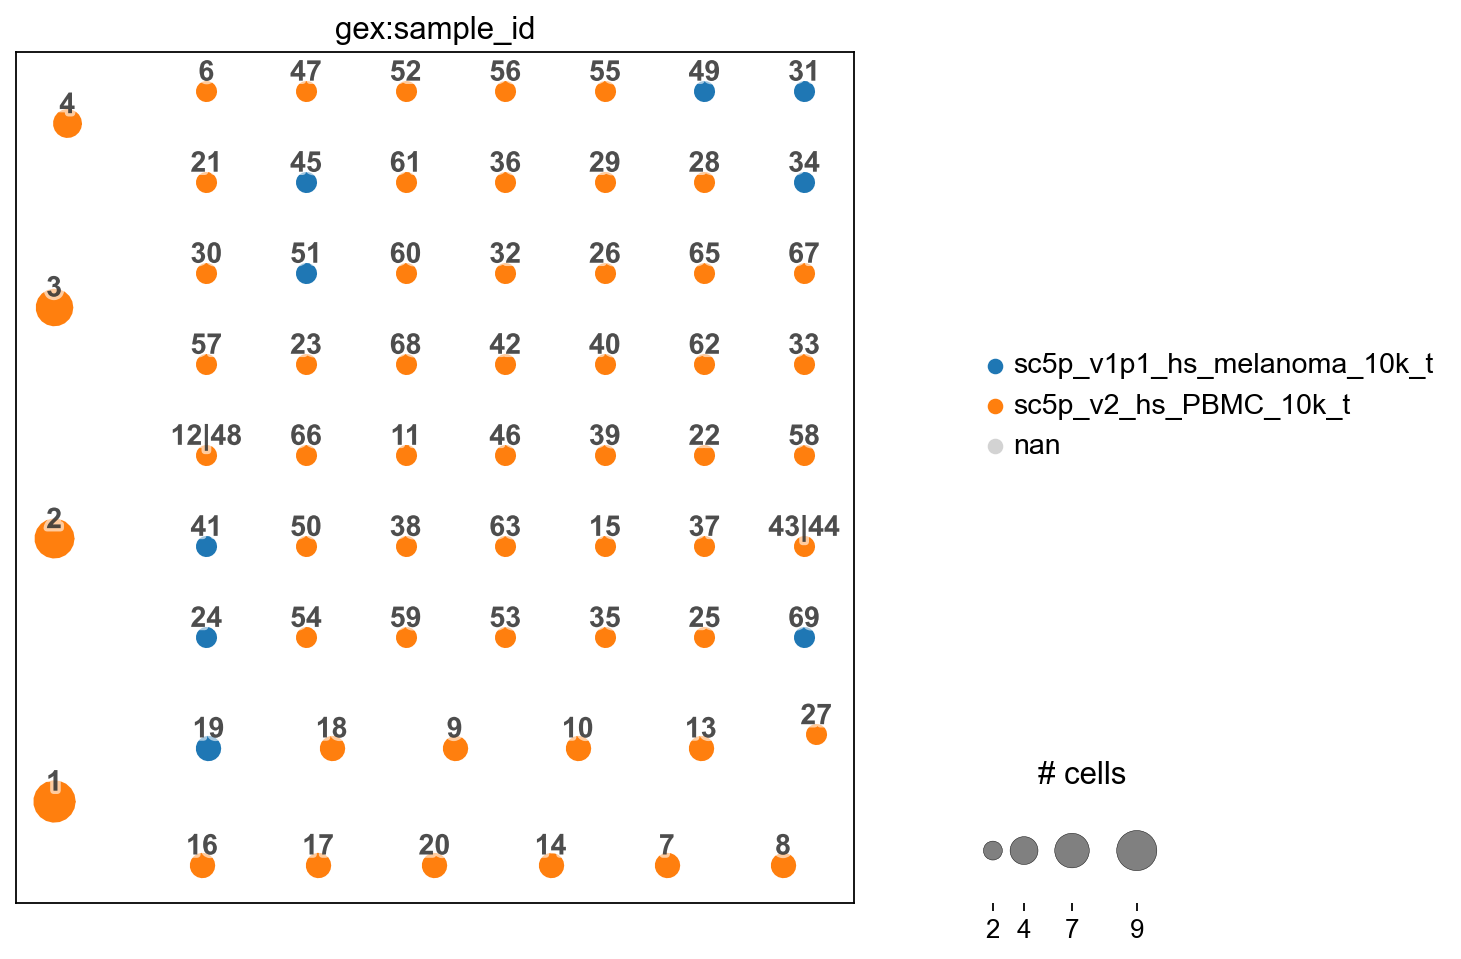

In [35]:
ddl.tl.transfer(iradata, vdj, clone_key="clone_id_rank", collapse_nodes=True)
ir.tl.clonotype_network(iradata, clonotype_key="clone_id_rank", min_cells=2)
ir.pl.clonotype_network(iradata, color="gex:sample_id", panel_size=(7, 7))

<b>Finish.</b>

We can save the files.

In [36]:
adata.write("adata_tcr.h5ad", compression="gzip")

In [37]:
vdj.write_h5ddl("dandelion_results_tcr.h5ddl", compression="gzip")